# Dog breed classifier

This applet takes an image of a dog and attempts to determine its breed, using transfer learning built on top of resnet50, a residual neural network. It's based off a Udacity problem set, using a solution provided by https://github.com/denizn/Dog-Breed-Classifier and described at https://towardsdatascience.com/dog-breed-classification-using-cnns-f042fbe0f333

In [1]:
img_path = ''
img_path__format = 'upload'

# cache keras models inside notebook directory
import os
os.environ['KERAS_HOME'] = '_keras'

import cv2
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image                  
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
resnet50_orig = ResNet50(weights='imagenet', include_top=False, pooling="avg")

Using TensorFlow backend.
/Users/lhon/notebooks/Dog-Breed-Classifier/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lhon/notebooks/Dog-Breed-Classifier/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lhon/notebooks/Dog-Breed-Classifier/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [2]:
#bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')
#train_ResNet50 = bottleneck_features['train']
#valid_ResNet50 = bottleneck_features['valid']
#test_ResNet50 = bottleneck_features['test']

#train_ResNet50.shape
# (6680, 1, 1, 2048)

ResNet50_model = Sequential()
ResNet50_model.add(GlobalAveragePooling2D(input_shape=(1,1,2048)))
#ResNet50_model.add(GlobalAveragePooling2D(input_shape=train_ResNet50.shape[1:]))
ResNet50_model.add(Dense(133, activation='softmax'))

ResNet50_model.summary()
### Define the model

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [3]:
ResNet50_model.load_weights('saved_models/weights.best.ResNet50.hdf5')
### Load the model weights with the best validation loss.VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

In [4]:

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

# unzip -l dogImages.zip | grep train | grep /$ | awk '{print $4}' | cut -d/ -f3 | cut -c5- | sed 's/_/ /g' > dog_names.txt
with open('dog_names.txt') as f:
    dog_names = [line.strip() for line in f.readlines() if line.strip()]

### A function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
# https://github.com/udacity/dog-project/blob/master/extract_bottleneck_features.py
# https://stackoverflow.com/questions/51231576/tensorflow-keras-expected-global-average-pooling2d-1-input-to-have-shape-1-1
def classify_dog_breed(img_path):
    img = path_to_tensor(img_path)
    
    bottleneck_feature = resnet50_orig.predict(preprocess_input(img))
    bottleneck_feature = np.expand_dims(bottleneck_feature, axis=0)
    bottleneck_feature = np.expand_dims(bottleneck_feature, axis=0)

    predictions = ResNet50_model.predict(bottleneck_feature)
    prediction = np.argmax(predictions)
    print('This image looks like a {}.'.format(dog_names[prediction]))
    return predictions

This image looks like a Welsh springer spaniel.
Top scores:
1. Welsh springer spaniel (0.82)
2. Irish red and white setter (0.16)
3. Basset hound (0.01)


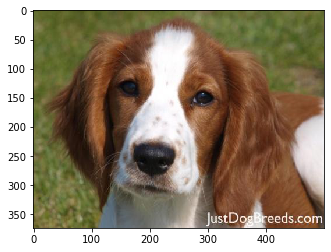

In [5]:
#img_path = 'images/Welsh_springer_spaniel_08203.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
predictions = classify_dog_breed(img_path)

print("Top scores:")
results = sorted(enumerate(predictions[0]), key=lambda x: -x[1])
for i, (idx, score) in enumerate(results[:3]):
    print(f'{i+1}. {dog_names[idx]} ({score:0.2f})')